In [1]:
import os
import pandas as pd

In [2]:
clinical_scores_mrs01_path = '/Users/jk1/OneDrive - unige.ch/stroke_research/scope/output/clinical_scores/mrs01_clinical_scores_results.csv'
clinical_scores_mrs02_path = '/Users/jk1/OneDrive - unige.ch/stroke_research/scope/output/clinical_scores/mrs02_clinical_scores_results.csv'

imaging_results_mrs01_path = '/Users/jk1/temp/keras_scope_server_output/mrs01/cv_20210921-213143/cv_test_results.csv'
imaging_results_mrs02_path = '/Users/jk1/temp/keras_scope_server_output/mrs02/cv_20210909-084904/cv_test_results.csv'

In [3]:
clinical_scores_mrs01_df = pd.read_csv(clinical_scores_mrs01_path)
clinical_scores_mrs02_df = pd.read_csv(clinical_scores_mrs02_path)

imaging_results_mrs01_df = pd.read_csv(imaging_results_mrs01_path)
imaging_results_mrs02_df = pd.read_csv(imaging_results_mrs02_path)

In [4]:
overall_results_columns = ['ground truth', 'method', 'auc', 'accuracy', 'f1', 'precision', 'recall']

In [5]:
overall_results_df = pd.concat([clinical_scores_mrs01_df[overall_results_columns],
                                clinical_scores_mrs02_df[overall_results_columns]])

overall_results_df = overall_results_df.append(pd.DataFrame([[
    '3M mRS 0-1', 'keras_scope 3dcnn',
    imaging_results_mrs01_df['auc'].median(),
    imaging_results_mrs01_df['acc'].median(),
    imaging_results_mrs01_df['f1_m'].median(),
    imaging_results_mrs01_df['precision'].median(),
    imaging_results_mrs01_df['recall'].median(),
]], columns=overall_results_columns), ignore_index=True)

overall_results_df = overall_results_df.append(pd.DataFrame([[
    '3M mRS 0-2', 'keras_scope 3dcnn',
    imaging_results_mrs02_df['auc'].median(),
    imaging_results_mrs02_df['acc'].median(),
    imaging_results_mrs02_df['f1_m'].median(),
    imaging_results_mrs02_df['precision'].median(),
    imaging_results_mrs02_df['recall'].median(),
]], columns=overall_results_columns), ignore_index=True)

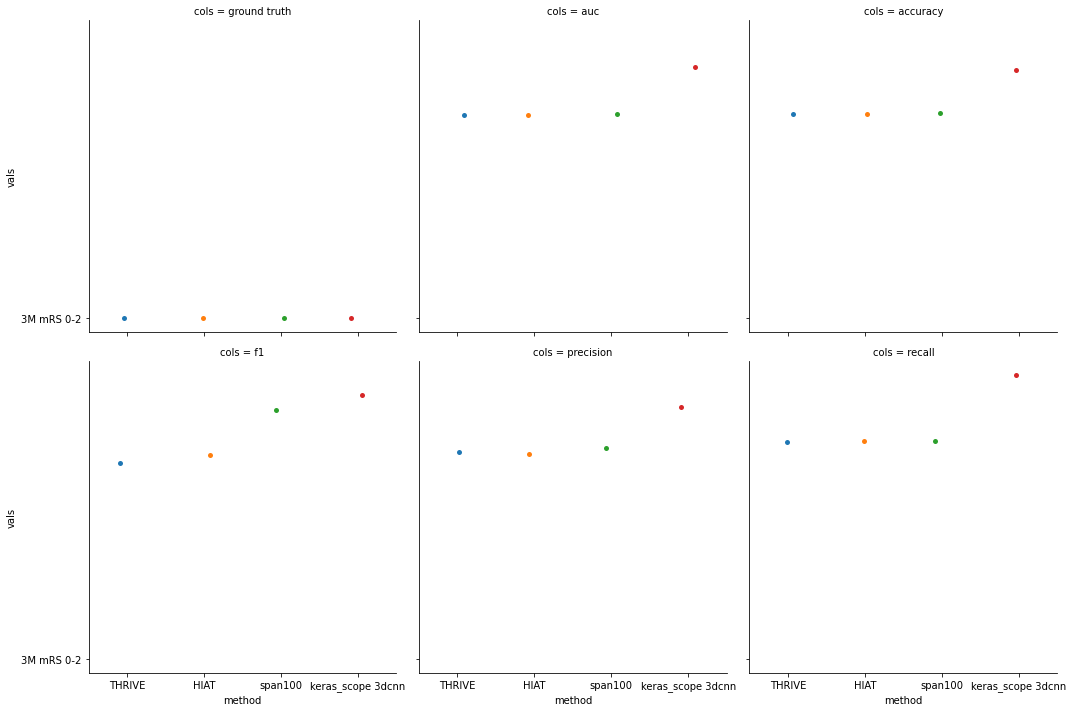

In [6]:
import seaborn as sns

g = sns.catplot(x="method", y='vals',
                hue="method",
                col='cols', col_wrap=3,
                data=overall_results_df[overall_results_df['ground truth'] == '3M mRS 0-2']\
                        .melt('method', var_name='cols', value_name='vals')
                )

In [7]:
mrs02_df = overall_results_df[overall_results_df['ground truth'] == '3M mRS 0-2']
